# Import Required Libraries
Import numpy, matplotlib.pyplot, solve_ivp from scipy.integrate, and interact and FloatSlider from ipywidgets.

In [74]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, Button, HBox, VBox
import mplcursors
from functools import partial
from matplotlib.lines import Line2D

# plots in dark mode
#plt.style.use('dark_background')

# Define the Conformity Function
Define the function f(x, alpha) that models the conformity behavior.

In [75]:
# Define the Conformity Function
def f(x, alpha):
    if x <= 0.5:
        return (((2 * max(x, 0)) ** (alpha)) / 2)
    else:
        return (1 - ((2 * max(1 - x, 0)) ** (alpha)) / 2)

# Vectorize f(x) for plotting
f_vec = np.vectorize(f)

# Define the Dynamical System
Define the function dynamics(t, y, s, m, alpha) that models the dynamical system.

In [76]:
# Define the Dynamical System
def dynamics(t, y, s, m, alpha):
    x_i, x_s = y
    x = (1 - s) * x_i + s * x_s
    dx_i_dt = m - x_i
    dx_s_dt = f(x, alpha) - x_s
    return [dx_i_dt, dx_s_dt]

# Plot Function with Interactive Sliders
Define the function plot_system $(s, m, \alpha, x_{i0}, x_{s0})$ and use interact to create interactive sliders for the parameters.

interactive(children=(FloatSlider(value=0.96, description='s', max=1.0, step=0.01), FloatSlider(value=0.35, de…

<function __main__.plot_system(s, m, alpha, x_i0, x_s0, save=False)>

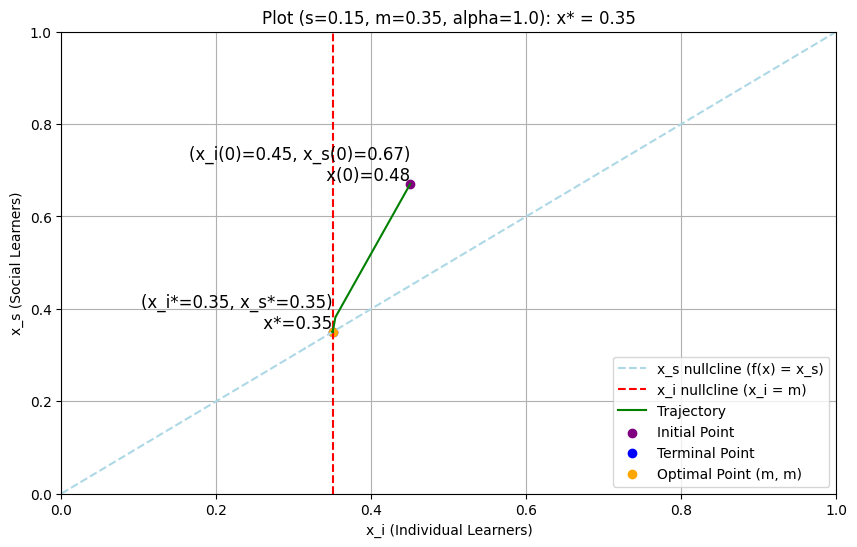

In [77]:
# Plot Function with Interactive Sliders
def plot_f_and_x(s, m, alpha, t, x_t):
    # we create a subplot with 2 columns and 1 row
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    # we plot f(x) in the first subplot
    x_vals = np.linspace(0, 1, 300)
    f_vals = f_vec(x_vals, alpha)
    axs[0].plot(x_vals, f_vals, 'c-', label='f(x)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    axs[0].set_title('Conformity Function f(x) for alpha={:.1f}'.format(alpha))
    axs[0].grid()
    axs[0].legend()
    # we plot x(t) in the second subplot
    # Plot x(t) = (1-s)x_i(t) + s x_s(t) over time
    axs[1].plot(t, x_t, label='x(t) = (1-s)x_i(t) + s x_s(t)', color='orange')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('x(t)')
    axs[1].set_title('Trajectory of x(t) over time')
    axs[1].axhline(y=0.5, color='r', linestyle='--', label='x=0.5')
    axs[1].axhline(y=m, color='g', linestyle='--', label='x=m')
    axs[1].set_ylim(0, 1)
    axs[1].grid()
    axs[1].legend()
    
    # Connect click event
    plt.show()
    
def plot_system(s, m, alpha, x_i0, x_s0, save=False):
    t_final = 999
    t_span = (0, t_final)
    y0 = [x_i0, x_s0]
    sol = solve_ivp(dynamics, t_span, y0, args=(s, m, alpha), dense_output=True)
    t = np.linspace(t_span[0], t_span[1], 300)
    x_i, x_s = sol.sol(t)
    x_t = (1 - s) * x_i + s * x_s

    plt.figure(figsize=(10, 6))
    plt.plot([m, m], [0, 1], 'r--', label='x_i nullcline (x_i = m)')
    x_s_vals = np.linspace(0, 1, 300)
    x_i_vals = np.linspace(0, 1, 300)
    X_i, X_s = np.meshgrid(x_i_vals, x_s_vals)
    X = (1-s)*X_i + s*X_s
    F_X_vals = f_vec(X, alpha)
    contour = plt.contour(X_i, X_s, F_X_vals - X_s, levels=[0], colors='lightblue', linestyles='dashed')
    
    # Trajectory and initial point
    plt.plot(x_i, x_s, 'g-', label='Trajectory')
    plt.scatter([x_i0], [x_s0], color='purple', label='Initial Point')
    # put text on the initial point
    x_initial = (1 - s) * x_i0 + s * x_s0
    plt.text(x_i0, x_s0, f'(x_i(0)={x_i0:.2f}, x_s(0)={x_s0:.2f})\n x(0)={x_initial:.2f}', fontsize=12, ha='right', va='bottom')
    
    # plot terminal point (t=t_final)
    x_terminal = (1 - s) * x_i[-1] + s * x_s[-1]
    plt.text(x_i[-1], x_s[-1], f'(x_i*={x_i[-1]:.2f}, x_s*={x_s[-1]:.2f})\n x*={x_terminal:.2f}', fontsize=12, ha='right', va='bottom')
    plt.scatter([x_i[-1]], [x_s[-1]], color='blue', label='Terminal Point')
    
    plt.scatter([m], [m], color='orange', label='Optimal Point (m, m)')
    plt.xlabel('x_i (Individual Learners)')
    plt.ylabel('x_s (Social Learners)')
    plt.title(f'Plot (s={s}, m={m}, alpha={alpha:.1f}): x* = {x_terminal:.2f}')

    # Create a proxy artist for the contour plot
    proxy = Line2D([0], [0], linestyle='dashed', color='lightblue')

    # Combine the handles and labels for the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [proxy] + handles  # Add the proxy artist at the beginning
    labels = ['x_s nullcline (f(x) = x_s)'] + labels  # Add corresponding label at the beginning

    # Create a single legend
    plt.legend(handles=handles, labels=labels, loc='lower right')
    plt.grid()
    
    if save:
        filename = f'img/plot_s_{s}_m_{m}_alpha_{alpha:.1f}_xi0_{x_i0}_xs0_{x_s0}.png'
        plt.savefig(filename)
        print(f"Plot saved as {filename}")
    
    plt.show()
    plot_f_and_x(s, m, alpha, t, x_t)

def save_plot_callback(s, m, alpha, x_i0, x_s0):
    plot_system(s, m, alpha, x_i0, x_s0, save=True)

# Interactive sliders
s_slider = FloatSlider(value=0.96, min=0, max=1, step=0.01, description='s')
m_slider = FloatSlider(value=0.35, min=0, max=1, step=0.01, description='m')
alpha_slider = FloatSlider(value=1.1, min=0.0, max=3, step=0.1, description='alpha')
x_i0_slider = FloatSlider(value=0.45, min=0, max=1, step=0.01, description='x_i(0)')
x_s0_slider = FloatSlider(value=0.67, min=0, max=1, step=0.01, description='x_s(0)')

# Save button
save_button = Button(description="Save Plot")
save_button.on_click(lambda b: save_plot_callback(s_slider.value, m_slider.value, alpha_slider.value, x_i0_slider.value, x_s0_slider.value))

# Display sliders and button
ui = VBox([s_slider, m_slider, alpha_slider, x_i0_slider, x_s0_slider, save_button])
out = interact(plot_system, s=s_slider, m=m_slider, alpha=alpha_slider, x_i0=x_i0_slider, x_s0=x_s0_slider)
display(ui, out)